In [8]:
# 데이터 처리
from __future__ import print_function
from IPython.display import display, HTML
import numpy as np
import pandas as pd
# 머신러닝 알고리즘 및 평가
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#####Universal bank 데이터 변수설명: 변수명	변수설명	변수속성
#Age	완성 된 연도의 고객의 연령	연속형
#Experienc	수년간의 전문적인 경험	연속형
#Incom	고객의 연간 수입	연속형
#Family	고객의 가족 규모	연속형
#CCAvg	평균 신용 카드 지출	연속형
#Education	교육 수준 (1 : Undergrad , 2 : 대학원, 3 : 고급 / 전문)	범주형
#Mortgag	주택 모기지의 가치	연속형
#PersonalLoan	고객은 마지막 캠페인에 제공된 개인 대출을 수락 하였나? (목표 변수)	범주형
#SecuritiesAccount	고객은 은행에 증권 계좌를 가지고 있는가?	범주형
#CDAccount	고객은 은행에 예금 계좌를 가지고 있는가?	범주형
#Online	고객이 인터넷 뱅킹 시설을 사용하는가?	범주형
#CreditCard	고객이 Universal Bank에서 발행 한 신용 카드를 사용하는가?	범주형

In [11]:
# 데이터 불러오기
dat_dir = 'C:/Users/pc-user/Desktop/yscho/Hanhwa/'
dat = pd.read_csv(dat_dir+"Classification_1_UniversalBank.csv")
# 데이터 예시 확인
#dat.head(20) 
dat

ID  Age  Experience  Income  ZIP Code  Family     CCAvg  Education  \
0        1   25           1      49     91107       4  1.600000          1   
1        2   45          19      34     90089       3  1.500000          1   
2        3   39          15      11     94720       1  1.000000          1   
3        4   35           9     100     94112       1  2.700000          2   
4        5   35           8      45     91330       4  1.000000          2   
5        6   37          13      29     92121       4  0.400000          2   
6        7   53          27      72     91711       2  1.500000          2   
7        8   50          24      22     93943       1  0.300000          3   
8        9   35          10      81     90089       3  0.600000          2   
9       10   34           9     180     93023       1  8.900000          3   
10      11   65          39     105     94710       4  2.400000          3   
11      12   29           5      45     90277       3  0.100000          2   
12      13   48          23     114     93106       2  3.800000          3   
13      14   59          32      40     94920       4  2.500000          2   
14      15   67          41     112     91741       1  2.000000          1   
15      16   60          30      22     95054       1  1.500000          3   
16      17   38          14     130     95010       4  4.700000          3   
17      18   42          18      81     94305       4  2.400000          1   
18      19   46          21     193     91604       2  8.100000          3   
19      20   55          28      21     94720       1  0.500000          2   
20      21   56          31      25     94015       4  0.900000          2   
21      22   57          27      63     90095       3  2.000000          3   
22      23   29           5      62     90277       1  1.200000          1   
23      24   44          18      43     91320       2  0.700000          1   
24      25   36          11     152     95521       2  3.900000          1   
25      26   43          19      29     94305       3  0.500000          1   
26      27   40          16      83     95064       4  0.200000          3   
27      28   46          20     158     90064       1  2.400000          1   
28      29   56          30      48     94539       1  2.200000          3   
29      30   38          13     119     94104       1  3.300000          2   
...    ...  ...         ...     ...       ...     ...       ...        ...   
4970  4971   37          13      95     95821       2  1.700000          2   
4971  4972   58          28      73     90024       1  1.400000          3   
4972  4973   58          32      41     93401       3  2.200000          3   
4973  4974   31           1      68     95045       4  4.000000          3   
4974  4975   59          33      64     92867       4  1.700000          2   
4975  4976   38          11      29     95207       4  1.000000          2   
4976  4977   29           5      31     95039       1  1.800000          2   
4977  4978   40          15      54     90266       3  0.800000          3   
4978  4979   57          27      63     90210       4  2.000000          3   
4979  4980   50          26      92     90740       1  2.600000          2   
4980  4981   29           5     135     95762       3  5.300000          1   
4981  4982   34           9     195     90266       2  3.000000          1   
4982  4983   36          10      45     95126       4  0.200000          1   
4983  4984   51          26      72     95370       1  2.900000          1   
4984  4985   27           1      98     94043       4  2.300000          3   
4985  4986   48          23      30     94720       3  1.700000          2   
4986  4987   32           6      78     95825       1  2.900000          3   
4987  4988   48          23      43     93943       3  1.700000          2   
4988  4989   34           8      85     95134       1  2.500000          1   
4989  4990   24           0   

In [12]:
dat.shape

(5000, 14)

In [13]:
# 의미없는 변수 제거: ID, ZIP Code
dat_processing = dat.drop(['ID','ZIP Code'], axis=1, inplace=False)
dat_processing.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [14]:
# Normalization
dat_processing_norm = preprocessing.minmax_scale(dat_processing)
dat_processed = pd.DataFrame(dat_processing_norm)
dat_processed.columns = dat_processing.columns

In [15]:
dat_processed.shape


(5000, 12)

In [16]:
dat_processed

Age  Experience    Income    Family     CCAvg  Education  Mortgage  \
0     0.045455    0.086957  0.189815  1.000000  0.160000        0.0  0.000000   
1     0.500000    0.478261  0.120370  0.666667  0.150000        0.0  0.000000   
2     0.363636    0.391304  0.013889  0.000000  0.100000        0.0  0.000000   
3     0.272727    0.260870  0.425926  0.000000  0.270000        0.5  0.000000   
4     0.272727    0.239130  0.171296  1.000000  0.100000        0.5  0.000000   
5     0.318182    0.347826  0.097222  1.000000  0.040000        0.5  0.244094   
6     0.681818    0.652174  0.296296  0.333333  0.150000        0.5  0.000000   
7     0.613636    0.586957  0.064815  0.000000  0.030000        1.0  0.000000   
8     0.272727    0.282609  0.337963  0.666667  0.060000        0.5  0.163780   
9     0.250000    0.260870  0.796296  0.000000  0.890000        1.0  0.000000   
10    0.954545    0.913043  0.449074  1.000000  0.240000        1.0  0.000000   
11    0.136364    0.173913  0.171296  0.666667  0.010000        0.5  0.000000   
12    0.568182    0.565217  0.490741  0.333333  0.380000        1.0  0.000000   
13    0.818182    0.760870  0.148148  1.000000  0.250000        0.5  0.000000   
14    1.000000    0.956522  0.481481  0.000000  0.200000        0.0  0.000000   
15    0.840909    0.717391  0.064815  0.000000  0.150000        1.0  0.000000   
16    0.340909    0.369565  0.564815  1.000000  0.470000        1.0  0.211024   
17    0.431818    0.456522  0.337963  1.000000  0.240000        0.0  0.000000   
18    0.522727    0.521739  0.856481  0.333333  0.810000        1.0  0.000000   
19    0.727273    0.673913  0.060185  0.000000  0.050000        0.5  0.000000   
20    0.750000    0.739130  0.078704  1.000000  0.090000        0.5  0.174803   
21    0.772727    0.652174  0.254630  0.666667  0.200000        1.0  0.000000   
22    0.136364    0.173913  0.250000  0.000000  0.120000        0.0  0.409449   
23    0.477273    0.456522  0.162037  0.333333  0.070000        0.0  0.256693   
24    0.295455    0.304348  0.666667  0.333333  0.390000        0.0  0.250394   
25    0.454545    0.478261  0.097222  0.666667  0.050000        0.0  0.152756   
26    0.386364    0.413043  0.347222  1.000000  0.020000        1.0  0.000000   
27    0.522727    0.500000  0.694444  0.000000  0.240000        0.0  0.000000   
28    0.750000    0.717391  0.185185  0.000000  0.220000        1.0  0.000000   
29    0.340909    0.347826  0.513889  0.000000  0.330000        0.5  0.000000   
...        ...         ...       ...       ...       ...        ...       ...   
4970  0.318182    0.347826  0.402778  0.333333  0.170000        0.5  0.000000   
4971  0.795455    0.673913  0.300926  0.000000  0.140000        1.0  0.000000   
4972  0.795455    0.760870  0.152778  0.666667  0.220000        1.0  0.233071   
4973  0.181818    0.086957  0.277778  1.000000  0.400000        1.0  0.000000   
4974  0.818182    0.782609  0.259259  1.000000  0.170000        0.5  0.000000   
4975  0.340909    0.304348  0.097222  1.000000  0.100000        0.5  0.000000   
4976  0.136364    0.173913  0.106481  0.000000  0.180000        0.5  0.000000   
4977  0.386364    0.391304  0.212963  0.666667  0.080000        1.0  0.000000   
4978  0.772727    0.652174  0.254630  1.000000  0.200000        1.0  0.000000   
4979  0.613636    0.630435  0.388889  0.000000  0.260000        0.5  0.335433   
4980  0.136364    0.173913  0.587963  0.666667  0.530000        0.0  0.000000   
4981  0.250000    0.260870  0.865741  0.333333  0.300000        0.0  0.192126   
4982  0.295455    0.282609  0.171296  1.000000  0.020000        0.0  0.000000   
4983  0.636364    0.630435  0.296296  0.000000  0.290000        0.0  0.000000   
4984  0.090909    0.086957  0.416667  1.000000  0.230000        1.0  0.000000   
4985  0.568182    0.565217  0.101852  0.666667  0.170000        0.5  0.255118   
4986  0.204545    0.195652  0.324074  0.000000  0.290000        1.0  0.000000   
4987  0.568182    0.565217  0.162037  0.66

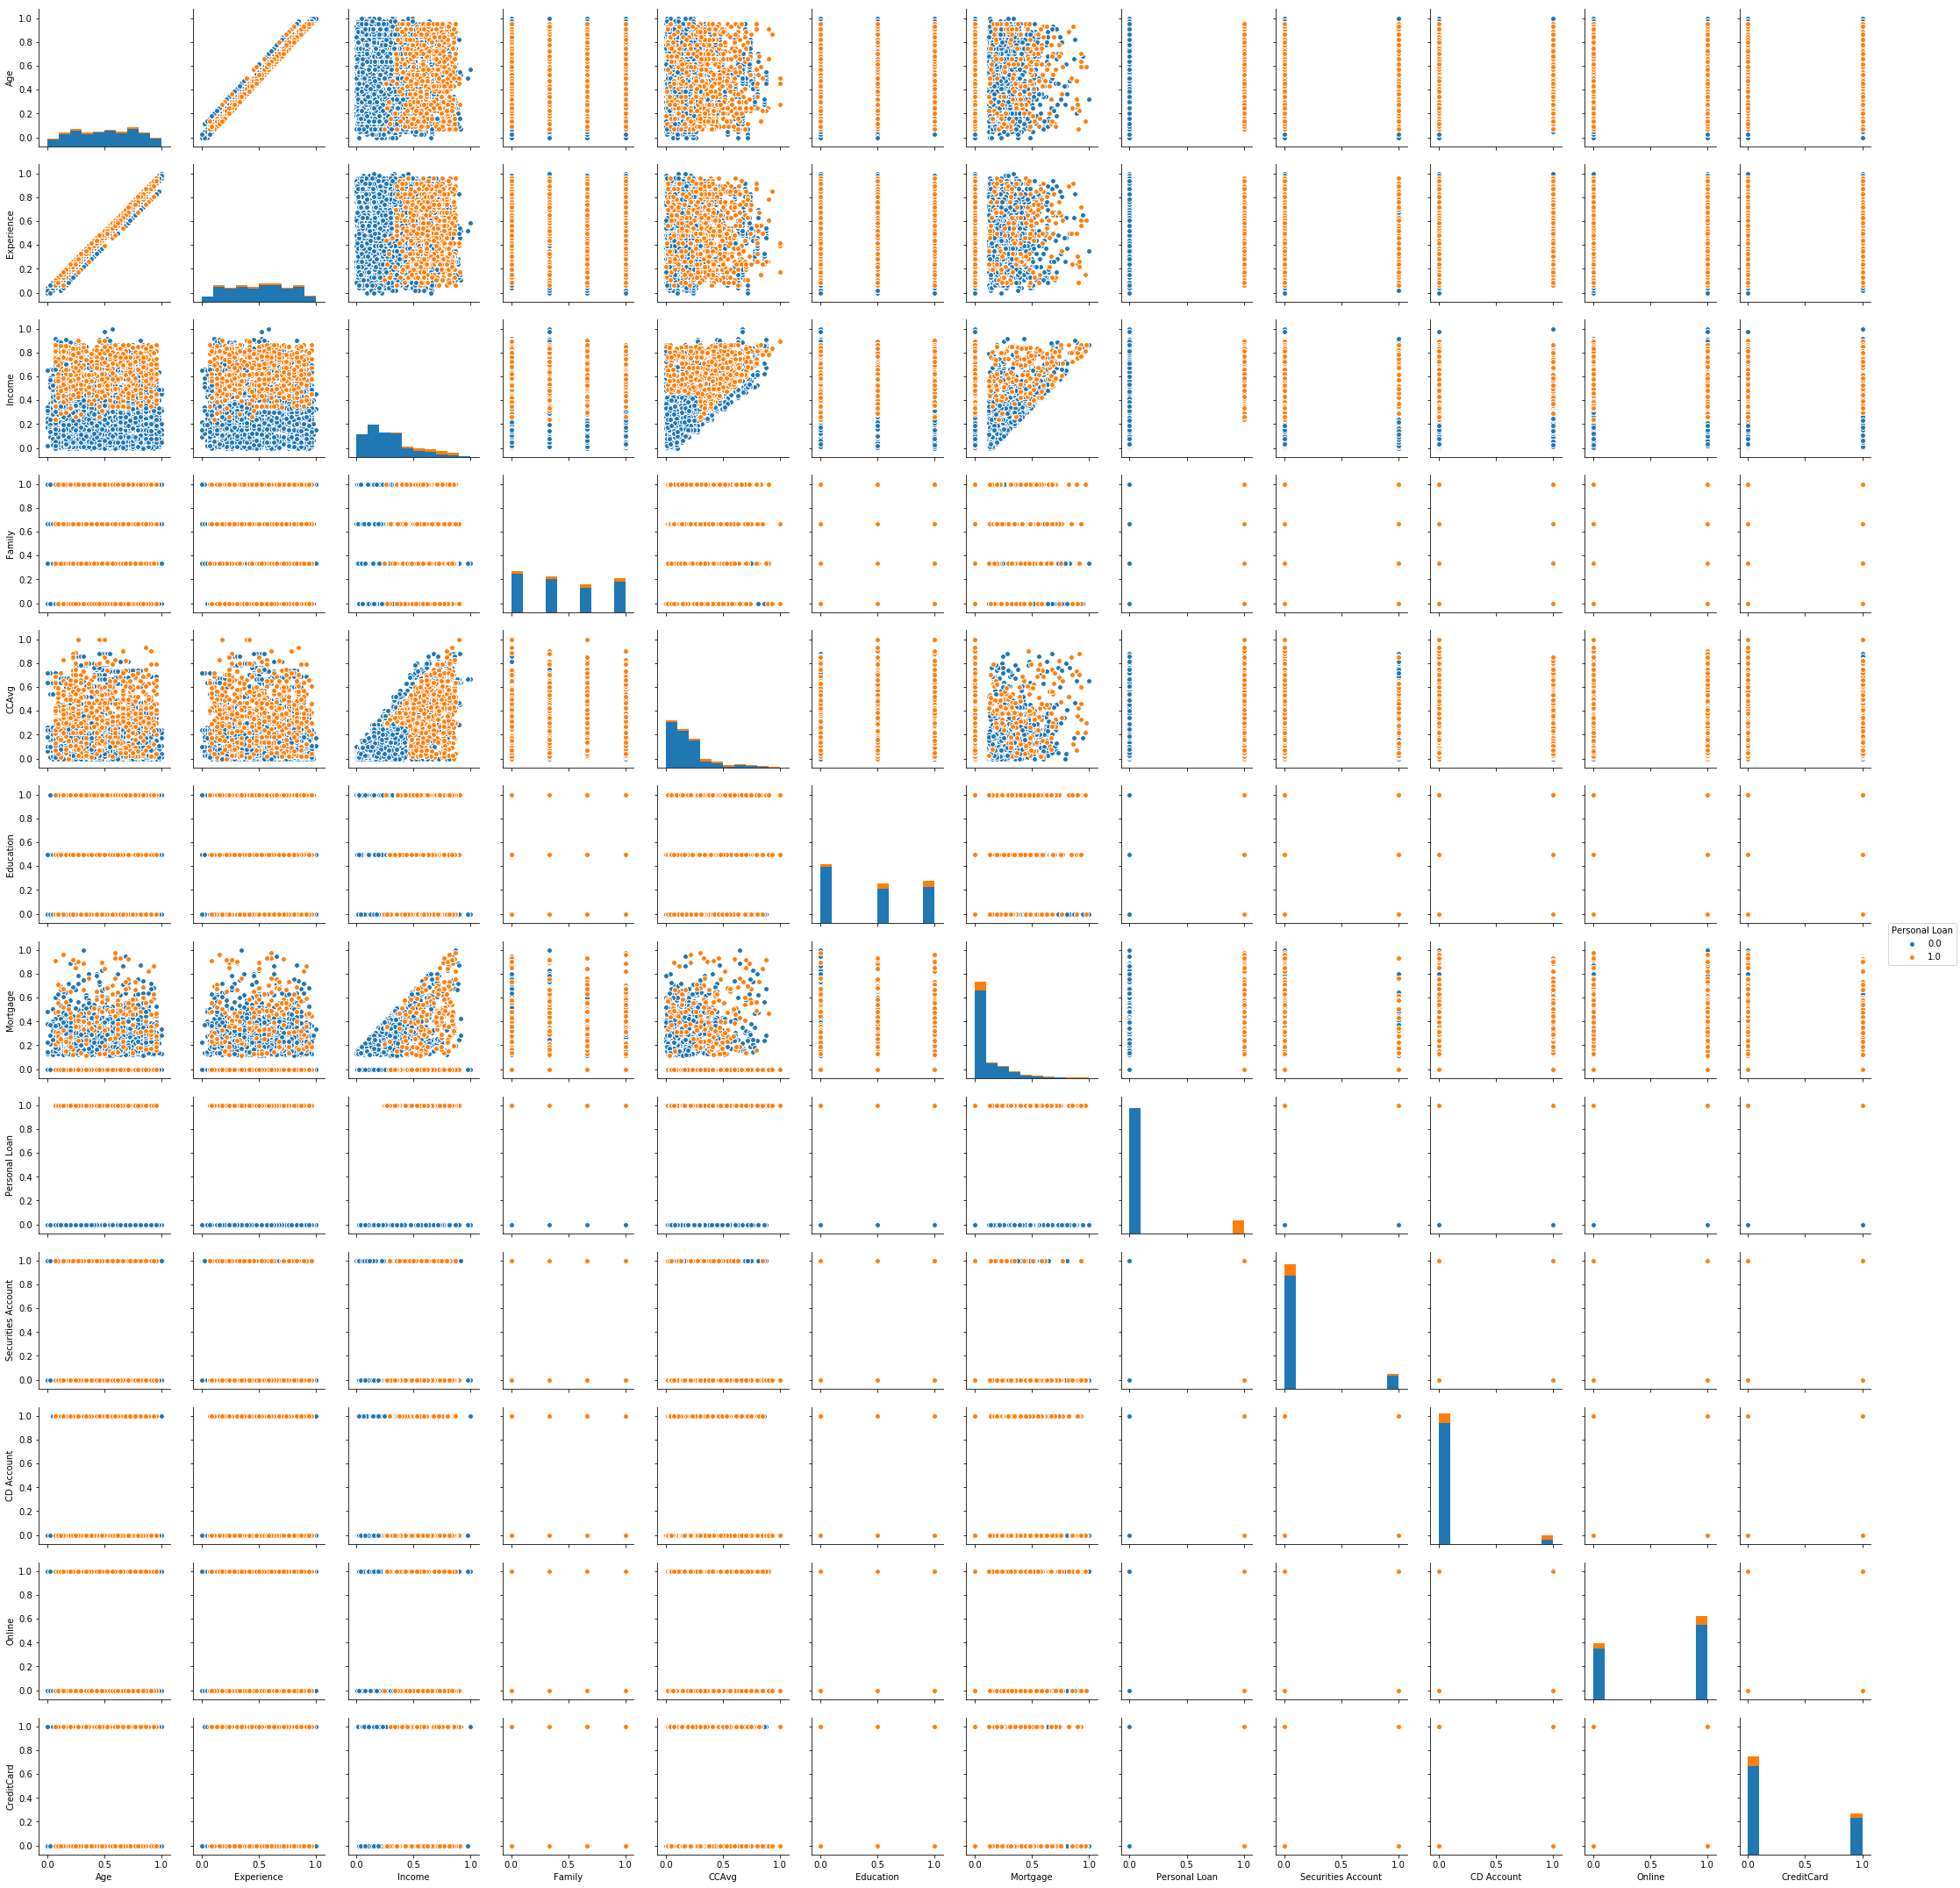

In [17]:
# EDA
# scatter plot
#sns.set(style='whitegrid', context='notebook')
sns.pairplot(dat_processed, hue="Personal Loan")
plt.show()

In [18]:
# 상수항 추가
dat_processed = sm.add_constant(dat_processed, has_constant='add')
print(dat_processed.head(20))

    const       Age  Experience    Income    Family  CCAvg  Education  \
0     1.0  0.045455    0.086957  0.189815  1.000000   0.16        0.0   
1     1.0  0.500000    0.478261  0.120370  0.666667   0.15        0.0   
2     1.0  0.363636    0.391304  0.013889  0.000000   0.10        0.0   
3     1.0  0.272727    0.260870  0.425926  0.000000   0.27        0.5   
4     1.0  0.272727    0.239130  0.171296  1.000000   0.10        0.5   
5     1.0  0.318182    0.347826  0.097222  1.000000   0.04        0.5   
6     1.0  0.681818    0.652174  0.296296  0.333333   0.15        0.5   
7     1.0  0.613636    0.586957  0.064815  0.000000   0.03        1.0   
8     1.0  0.272727    0.282609  0.337963  0.666667   0.06        0.5   
9     1.0  0.250000    0.260870  0.796296  0.000000   0.89        1.0   
10    1.0  0.954545    0.913043  0.449074  1.000000   0.24        1.0   
11    1.0  0.136364    0.173913  0.171296  0.666667   0.01        0.5   
12    1.0  0.568182    0.565217  0.490741  0.333333

In [19]:
dat_processed.columns

Index(['const', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [20]:
dat_processed.columns.difference(["Personal Loan"])

Index(['Age', 'CCAvg', 'CD Account', 'CreditCard', 'Education', 'Experience',
       'Family', 'Income', 'Mortgage', 'Online', 'Securities Account',
       'const'],
      dtype='object')

In [21]:
feature_columns = list(dat_processed.columns.difference(["Personal Loan"]))
feature_columns

['Age',
 'CCAvg',
 'CD Account',
 'CreditCard',
 'Education',
 'Experience',
 'Family',
 'Income',
 'Mortgage',
 'Online',
 'Securities Account',
 'const']

In [22]:
X = dat_processed[feature_columns]
y = dat_processed['Personal Loan'] # 대출여부: 1 or 0

In [23]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, train_size=0.7, test_size=0.3, random_state=2017010500)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(3500, 12) (1500, 12) (3500,) (1500,)


In [24]:
dat_processed.dtypes


const                 float64
Age                   float64
Experience            float64
Income                float64
Family                float64
CCAvg                 float64
Education             float64
Mortgage              float64
Personal Loan         float64
Securities Account    float64
CD Account            float64
Online                float64
CreditCard            float64
dtype: object

In [25]:
# 모델 구축 및 학습
model = sm.Logit(train_y, train_x)
results = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.126211
         Iterations 9


In [26]:
# performance measure
print("model AIC: ","{:.5f}".format(results.aic))
print("model BIC: ","{:.5f}".format(results.bic))
results.summary()

model AIC:  907.47757
model BIC:  981.40379


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Tue, 11 Sep 2018   Pseudo R-squ.:                  0.6009
Time:                        08:06:20   Log-Likelihood:                -441.74
converged:                       True   LL-Null:                       -1106.7
                                        LLR p-value:                1.554e-278
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -3.5613      3.199     -1.113      0.266      -9.831       2.708
CCAvg                  1.1306      0.476      2.374      0.018       0.197       2.064
CD Account             3.9763      0.391     10.168      0.000       3.210       4.743
CreditCard            -1.1714      0.257     -4.558      0.000      -1.675      -0.668
Education              3.5698      0.278     12.834      0.000       3.025       4.115
Experience             3.7869      3.330      1.137      0.255      -2.740      10.314
Family                 2.0169      0.274      7.362      0.000       1.480       2.554
Income                11.7232      0.679     17.270      0.000      10.393      13.054
Mortgage              -0.2903      0.439     -0.662      0.508      -1.150       0.569
Online                -0.7810      0.191     -4.092      0.000      -1.155      -0.407
Securities Account    -0.9352      0.335     -2.790      0.005      -1.592      -0.278
const                -10.4153      0.557    -18.709      0.000     -11.506      -9.324
======================================================================================
"""

In [41]:
train_y_pred = results.predict(train_x)
train_y_pred.head(20)

1935    0.996830
4212    0.000084
2646    0.991688
4253    0.002524
3918    0.006742
211     0.000404
4480    0.783521
1585    0.062098
2738    0.218773
1462    0.005687
669     0.010187
3787    0.008502
2307    0.001218
1587    0.000027
4403    0.008720
1059    0.000030
2313    0.001281
3728    0.263342
4340    0.055772
1919    0.000242
dtype: float64

In [42]:
test_y_pred = results.predict(test_x)
test_y_pred.head(20)

1816    0.007055
3038    0.000546
257     0.000075
4656    0.001514
1875    0.007634
2720    0.000039
880     0.000205
174     0.720417
2964    0.002561
3392    0.000255
1812    0.018712
2642    0.053810
2908    0.000772
3709    0.004094
4009    0.586573
1872    0.017396
135     0.000344
1857    0.013888
2809    0.975505
4132    0.018287
dtype: float64

In [43]:
# Cut-off 정의
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

In [44]:
train_y_pred_prob = results.predict(train_x)
train_y_pred = cut_off(train_y_pred_prob,0.5)
train_y_pred.head(20)

1935    1
4212    0
2646    1
4253    0
3918    0
211     0
4480    1
1585    0
2738    0
1462    0
669     0
3787    0
2307    0
1587    0
4403    0
1059    0
2313    0
3728    0
4340    0
1919    0
dtype: int32

In [45]:
test_y_pred_prob = results.predict(test_x)
test_y_pred = cut_off(test_y_pred_prob,0.5)
test_y_pred.head(20)

1816    0
3038    0
257     0
4656    0
1875    0
2720    0
880     0
174     1
2964    0
3392    0
1812    0
2642    0
2908    0
3709    0
4009    1
1872    0
135     0
1857    0
2809    1
4132    0
dtype: int32

In [46]:
test_y_pred_prob = results.predict(test_x)
test_y_pred = cut_off(test_y_pred_prob,0.5)
test_y_pred.head(20)

1816    0
3038    0
257     0
4656    0
1875    0
2720    0
880     0
174     1
2964    0
3392    0
1812    0
2642    0
2908    0
3709    0
4009    1
1872    0
135     0
1857    0
2809    1
4132    0
dtype: int32

In [47]:
# confusion matrix: Training set
cm_train = confusion_matrix(train_y,train_y_pred)
cm_train

array([[3119,   45],
       [ 118,  218]], dtype=int64)

In [48]:
# confusion matrix: Test set
cm_test = confusion_matrix(test_y,test_y_pred)
cm_test

array([[1338,   18],
       [  60,   84]], dtype=int64)

In [49]:
# performance evaluation
def perf_eval(cm):
    # True positive rate: TPR
    TPR = cm[1, 1] / sum(cm[1]) # recall
    # True negative rate: TNR
    TNR = cm[0, 0] / sum(cm[0])
    # Simple Accuracy
    ACC = (cm[0, 0] + cm[1, 1]) / sum(cm.reshape(-1,))
    # Balanced Correction Rate
    BCR = np.sqrt(TPR * TNR)
    # F1-measure
    Precision = cm[1,1] /sum(cm[:,1])
    F1 = 2*TPR*Precision/(TPR+Precision)
    return ([TPR, TNR, ACC, BCR, F1])

In [50]:
print('TPR:',perf_eval(cm_test)[0])
print('TNR:',perf_eval(cm_test)[1])
print('ACC:',perf_eval(cm_test)[2])
print('BCR:',perf_eval(cm_test)[3])
print('F1:',perf_eval(cm_test)[4])

TPR: 0.5833333333333334
TNR: 0.9867256637168141
ACC: 0.948
BCR: 0.7586764596990438
F1: 0.6829268292682927


In [51]:
# 임계값에 따른 비교
threshold = np.arange(0, 1, 0.1)
threshold

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [52]:
table = pd.DataFrame(columns=['TPR','TNR','ACC','BCR','F1'])
table

Empty DataFrame
Columns: [TPR, TNR, ACC, BCR, F1]
Index: []

In [53]:
for i in threshold:
    test_y_pred_tmp = cut_off(test_y_pred,i)
    cfmat = confusion_matrix(test_y, test_y_pred_tmp)
    table.loc[i] = perf_eval(cfmat)

In [54]:
table.index.name='threshold'
table.columns.name='performance'
table

performance       TPR       TNR    ACC       BCR        F1
threshold                                                 
0.0          0.583333  0.986726  0.948  0.758676  0.682927
0.1          0.583333  0.986726  0.948  0.758676  0.682927
0.2          0.583333  0.986726  0.948  0.758676  0.682927
0.3          0.583333  0.986726  0.948  0.758676  0.682927
0.4          0.583333  0.986726  0.948  0.758676  0.682927
0.5          0.583333  0.986726  0.948  0.758676  0.682927
0.6          0.583333  0.986726  0.948  0.758676  0.682927
0.7          0.583333  0.986726  0.948  0.758676  0.682927
0.8          0.583333  0.986726  0.948  0.758676  0.682927
0.9          0.583333  0.986726  0.948  0.758676  0.682927

In [55]:
# plotting: ROC, AUC curve 

def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):
    '''
    a funciton to plot the ROC curve for train labels and test labels.
    Use the best threshold found in train set to classify items in test set.
    '''
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_true, y_train_prob, pos_label =True)
    
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob > best_threshold

    cm_train = confusion_matrix(y_train_true, y_train)
    acc_train = accuracy_score(y_train_true, y_train)
    auc_train = roc_auc_score(y_train_true, y_train)

    print('Train Accuracy: %s ' %acc_train)
    print('Train AUC: %s ' %auc_train)
    print('Train Confusion Matrix:')
    print(cm_train)

    
    # Plotting ROC Curve for Train 
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    curve2 = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax.plot(best_fpr_train, best_tpr_train, marker='o', color='black')
    ax.text(best_fpr_train, best_tpr_train, s = '(%.3f,%.3f)' %(best_fpr_train, best_tpr_train))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Train), AUC = %.4f'%auc_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob > best_threshold

    cm_test = confusion_matrix(y_test_true, y_test)
    acc_test = accuracy_score(y_test_true, y_test)
    auc_test = roc_auc_score(y_test_true, y_test)

    print('Test Accuracy: %s ' %acc_test)
    print('Test AUC: %s ' %auc_test)
    print('Test Confusion Matrix:')
    print(cm_test)

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])
    
    # Plotting ROC Curve for Test 
    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    curve2 = ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.savefig('ROC', dpi = 500)
    plt.show()

    return best_threshold



Train Accuracy: 0.9031428571428571 
Train AUC: 0.8972160766961652 
Train Confusion Matrix:
[[2862  302]
 [  37  299]]
Test Accuracy: 0.888 
Test AUC: 0.8728797935103244 
Test Confusion Matrix:
[[1209  147]
 [  21  123]]


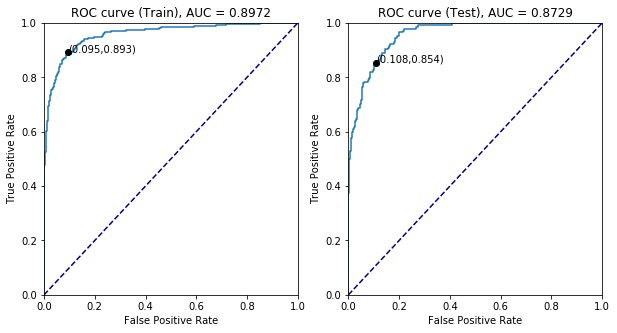

Cut-off: 0.10520401161557846


In [56]:
BestThreshold = plot_ROC(train_y,train_y_pred_prob, test_y, test_y_pred_prob)
print('Cut-off:', BestThreshold) # for training data